# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#print (api_key)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

lat = []
long = []
max_temp = []
hum = []
cloud = []
wind = []
date = []
country = []
city_final_list = []

record_count = 0

print("Beginning Data Retrieval")
print("------------------------")

   
for i in cities:
        
    try:
        response = requests.get(query_url + i).json()
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        
        
        record_count = record_count + 1
        print(f"Processing Record {record_count} | {i}")
        city_final_list.append(i)
                             

    except:
        print(f"City not found. Skipping...")

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")



Beginning Data Retrieval
------------------------
Processing Record 1 | nikolskoye
Processing Record 2 | kimbe
Processing Record 3 | airai
Processing Record 4 | ushuaia
Processing Record 5 | loreto
Processing Record 6 | kodiak
Processing Record 7 | vostok
Processing Record 8 | yulara
Processing Record 9 | albany
City not found. Skipping...
City not found. Skipping...
Processing Record 10 | matara
Processing Record 11 | saint-philippe
Processing Record 12 | suriapet
Processing Record 13 | vaini
Processing Record 14 | punta arenas
Processing Record 15 | cape town
Processing Record 16 | new norfolk
Processing Record 17 | novo aripuana
Processing Record 18 | hermanus
Processing Record 19 | busselton
Processing Record 20 | rikitea
Processing Record 21 | valle nacional
Processing Record 22 | longyearbyen
Processing Record 23 | hervey bay
Processing Record 24 | severo-kurilsk
Processing Record 25 | lata
Processing Record 26 | los llanos de aridane
Processing Record 27 | bethel
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_df = pd.DataFrame({'City': city_final_list,
                                'Cloudiness': cloud, 
                               'Country': country,
                               'Date': date,
                               'Humidity':hum,
                               'Lat': lat,
                                'Long' : long,
                               'Max Temp': max_temp,
                               'Wind Speed': wind})

city_weather_df.to_csv('WeatherPy.csv')
city_weather_df.head()
#len(city_final_list)

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,nikolskoye,75,RU,1571920263,66,59.70,30.79,53.01,13.42
1,kimbe,95,PG,1571920263,89,-5.56,150.15,76.96,2.44
2,airai,61,TL,1571920263,93,-8.93,125.41,64.63,3.13
3,ushuaia,75,AR,1571920263,75,-54.81,-68.31,46.40,19.46
4,loreto,0,PY,1571920263,42,-23.27,-57.32,77.41,4.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

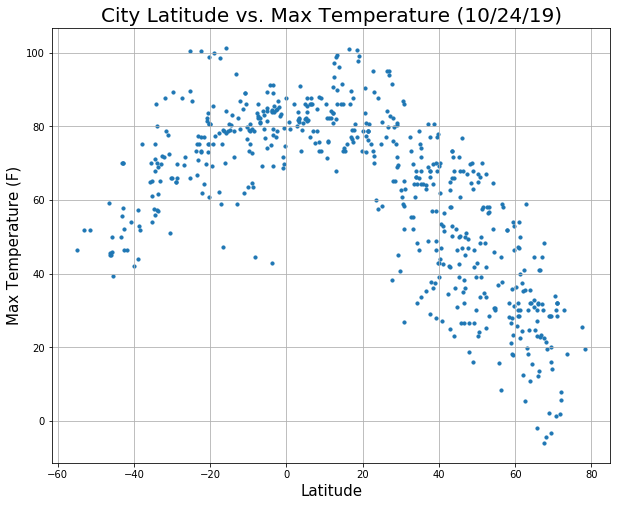

In [5]:
#Set todays date
date_now = datetime.now()
today = date_now.strftime("%m/%d/%y")


#Set the size for all of the subsequent graphs in this Jupyter Lab Book
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size


plt.scatter(city_weather_df.Lat, city_weather_df['Max Temp'], s=10)


plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 15)
plt.xlabel("Latitude", fontsize = 15 )
plt.grid(True)

plt.savefig("City_Latitude_vs_Max_Temp.png")


plt.show()

#### Latitude vs. Humidity Plot

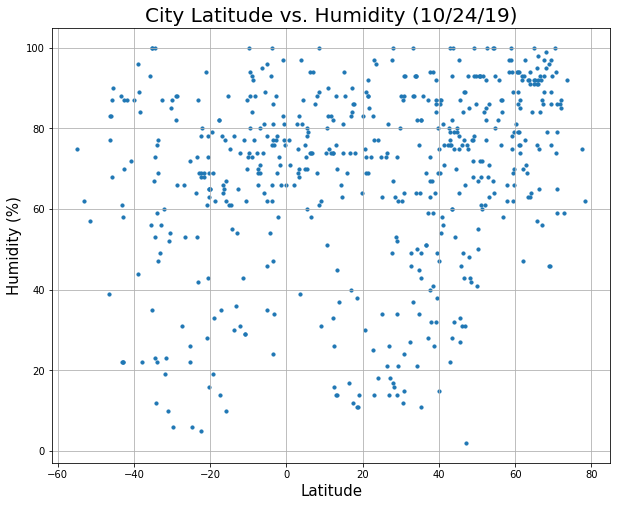

In [6]:
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, s=10)


plt.title(f"City Latitude vs. Humidity ({today})", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 15)
plt.xlabel("Latitude", fontsize = 15 )
plt.grid(True)

plt.savefig("City_Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

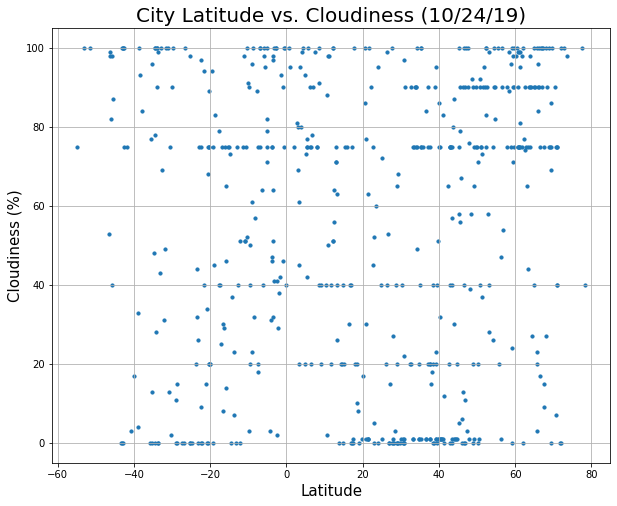

In [7]:
plt.scatter(city_weather_df.Lat, city_weather_df.Cloudiness, s=10)

plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 15)
plt.xlabel("Latitude", fontsize = 15 )
plt.grid(True)

plt.savefig("City_Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

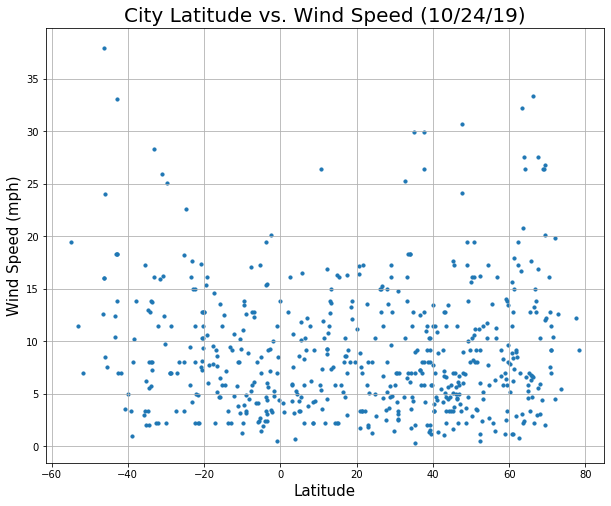

In [8]:
plt.scatter(city_weather_df.Lat, city_weather_df['Wind Speed'], s=10)

plt.title(f"City Latitude vs. Wind Speed ({today})", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 15)
plt.xlabel("Latitude", fontsize = 15 )
plt.grid(True)

plt.savefig("City_Latitude_vs_WindSpeed.png")

plt.show()